# Visualize ML model coefficients per class

## Import libraries

In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))

# insall ggmagnify from hughjonesd's universe to zoom in on plots
install.packages("ggmagnify", repos = c("https://hughjonesd.r-universe.dev", 
                 "https://cloud.r-project.org"))
suppressPackageStartupMessages(suppressWarnings(library(ggmagnify)))

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## Set paths and outputs

In [2]:
# Dir with coef files
input_data_dir <- "./coeff_data"

# Set output figure dir
output_fig_dir <- "./figures"

# Path to all coefficients file
all_coef_file <- file.path(input_data_dir, "all_coeffs.csv")

# Path to ranked coef file
ranked_coef_file <- file.path(input_data_dir, "ranked_coeffs.csv")

# Path to healthy coef file
healthy_coef_file <- file.path(input_data_dir, "healthy_coeffs.csv")

# Path to failing coef file
failing_coef_file <- file.path(input_data_dir, "failing_coeffs.csv")

# Paths for each figure output
all_coef_fig <- file.path(output_fig_dir, "logistic_regression_final_all_coefficients_plot.pdf")
ranked_coef_fig <- file.path(output_fig_dir, "logistic_regression_final_ranked_coefficients_line_plot.png")
healthy_coef_fig <- file.path(output_fig_dir, "logistic_regression_final_healthy_coefficients_plot.png")
failing_coef_fig <- file.path(output_fig_dir, "logistic_regression_final_failing_coefficients_plot.png")

## Load in and clean data frames to use in plotting

### Clean all coefficients data

In [3]:
# Load and clean healthy class data frame
all_coef_df <- readr::read_csv(
    all_coef_file, col_types = readr::cols(.default = "d", Feature = "c")
)

# Split out components of feature name for visualization
all_coef_df <- all_coef_df %>%
    dplyr::arrange(desc(abs(Coefficient))) %>%
    tidyr::separate(
        Feature,
        into = c(
            "compartment",
            "feature_group",
            "measurement",
            "channel", 
            "parameter1", 
            "parameter2",
            "parameter3"
        ),
        sep = "_",
        remove = FALSE
    ) %>%
    dplyr::mutate(channel_cleaned = channel)

# Convert the Coefficients to the absolute value
all_coef_df <- all_coef_df %>%
  mutate(Coefficient = abs(Coefficient))

all_coef_df$channel_cleaned <- dplyr::recode(all_coef_df$channel_cleaned,
    "Hoechst" = "Nucleus",
    "ER" = "ER",
    "Actin" = "Actin",
    "Mitochondria" = "Mito",
    "PM" = "PM",
    .default = "other",
    .missing = "other"
)

channels <- c(
    "Mito" = "Mito",
    "Nucleus" = "DNA",
    "PM" = "PM",
    "ER" = "ER",
    "Actin" = "Actin",
    "other" = "other"
)

all_coef_df <- all_coef_df %>%
    dplyr::filter(channel_cleaned %in% names(channels)) %>%
    dplyr::group_by(feature_group, channel_cleaned, compartment) %>%
    dplyr::slice_max(order_by = Coefficient, n = 1)

print(dim(all_coef_df))
head(all_coef_df, 3)

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 461 rows [1, 2, 3, 4, 5,
6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, ...].”


[1] 73 10


Feature,compartment,feature_group,measurement,channel,parameter1,parameter2,parameter3,Coefficient,channel_cleaned
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
Cells_AreaShape_Area,Cells,AreaShape,Area,NA,NA,NA,NA,0.3806866,other
Cytoplasm_AreaShape_MinorAxisLength,Cytoplasm,AreaShape,MinorAxisLength,NA,NA,NA,NA,0.2950718,other
Nuclei_AreaShape_MaxFeretDiameter,Nuclei,AreaShape,MaxFeretDiameter,NA,NA,NA,NA,1.0103446,other


### Clean healthy coefficients data

In [4]:
# Load and clean healthy class data frame
healthy_coef_df <- readr::read_csv(
    healthy_coef_file, col_types = readr::cols(.default = "d", Feature = "c")
)

# Split out components of feature name for visualization
healthy_coef_df <- healthy_coef_df %>%
    dplyr::arrange(desc(abs(Healthy_Coeffs))) %>%
    tidyr::separate(
        Feature,
        into = c(
            "compartment",
            "feature_group",
            "measurement",
            "channel", 
            "parameter1", 
            "parameter2",
            "parameter3"
        ),
        sep = "_",
        remove = FALSE
    ) %>%
    dplyr::mutate(channel_cleaned = channel)

healthy_coef_df$channel_cleaned <- dplyr::recode(healthy_coef_df$channel_cleaned,
    "Hoechst" = "Nucleus",
    "ER" = "ER",
    "Actin" = "Actin",
    "Mitochondria" = "Mito",
    "PM" = "PM",
    .default = "other",
    .missing = "other"
)

channels <- c(
    "Mito" = "Mito",
    "Nucleus" = "DNA",
    "PM" = "PM",
    "ER" = "ER",
    "Actin" = "Actin",
    "other" = "other"
)

healthy_coef_df <- healthy_coef_df %>%
    dplyr::filter(channel_cleaned %in% names(channels)) %>%
    dplyr::group_by(feature_group, channel_cleaned, compartment) %>%
    dplyr::slice_max(order_by = Healthy_Coeffs, n = 1)

print(dim(healthy_coef_df))
head(healthy_coef_df, 3)

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 145 rows [1, 2, 3, 5, 6,
7, 8, 9, 10, 11, 12, 13, 15, 17, 18, 19, 21, 24, 26, 27, ...].”


[1] 62 10


Feature,compartment,feature_group,measurement,channel,parameter1,parameter2,parameter3,Healthy_Coeffs,channel_cleaned
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
Cells_AreaShape_FormFactor,Cells,AreaShape,FormFactor,NA,NA,NA,NA,0.2871996,other
Cytoplasm_AreaShape_MinorAxisLength,Cytoplasm,AreaShape,MinorAxisLength,NA,NA,NA,NA,0.2950718,other
Nuclei_AreaShape_Zernike_4_0,Nuclei,AreaShape,Zernike,4,0,NA,NA,0.1007412,other


### Clean failing coefficient data

In [5]:
# Load and clean failing class data frame
failing_coef_df <- readr::read_csv(
    failing_coef_file, col_types = readr::cols(.default = "d", Feature = "c")
)

# Split out components of feature name for visualization
failing_coef_df <- failing_coef_df %>%
    dplyr::arrange(desc(abs(Failing_Coeffs))) %>%
    tidyr::separate(
        Feature,
        into = c(
            "compartment",
            "feature_group",
            "measurement",
            "channel", 
            "parameter1", 
            "parameter2",
            "parameter3"
        ),
        sep = "_",
        remove = FALSE
    ) %>%
    dplyr::mutate(channel_cleaned = channel)

failing_coef_df$channel_cleaned <- dplyr::recode(failing_coef_df$channel_cleaned,
    "Hoechst" = "Nucleus",
    "ER" = "ER",
    "Actin" = "Actin",
    "Mitochondria" = "Mito",
    "PM" = "PM",
    .default = "other",
    .missing = "other"
)

channels <- c(
    "Mito" = "Mito",
    "Nucleus" = "DNA",
    "PM" = "PM",
    "ER" = "ER",
    "Actin" = "Actin",
    "other" = "other"
)

failing_coef_df <- failing_coef_df %>%
    dplyr::filter(channel_cleaned %in% names(channels)) %>%
    dplyr::group_by(feature_group, channel_cleaned, compartment) %>%
    dplyr::slice_max(order_by = Failing_Coeffs, n = 1)

print(dim(failing_coef_df))
head(failing_coef_df, 2)


Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 181 rows [1, 2, 3, 4, 5,
6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 19, 20, 21, 23, 24, ...].”


[1] 64 10


Feature,compartment,feature_group,measurement,channel,parameter1,parameter2,parameter3,Failing_Coeffs,channel_cleaned
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
Cells_AreaShape_Area,Cells,AreaShape,Area,NA,NA,NA,NA,0.3806866,other
Cytoplasm_AreaShape_Zernike_0_0,Cytoplasm,AreaShape,Zernike,0,0,NA,NA,0.2224809,other


### Clean ranked coefficient data

In [6]:
# Load and clean failing class data frame
ranked_coef_df <- readr::read_csv(
    ranked_coef_file, col_types = readr::cols(.default = "d", Feature = "c")
)

# Split out components of feature name for visualization
ranked_coef_df <- ranked_coef_df %>%
    dplyr::arrange(desc(abs(Coefficient))) %>%
    tidyr::separate(
        Feature,
        into = c(
            "compartment",
            "feature_group",
            "measurement",
            "channel", 
            "parameter1", 
            "parameter2",
            "parameter3"
        ),
        sep = "_",
        remove = FALSE
    ) %>%
    dplyr::mutate(channel_cleaned = channel)

ranked_coef_df$channel_cleaned <- dplyr::recode(ranked_coef_df$channel_cleaned,
    "Hoechst" = "Nucleus",
    "ER" = "ER",
    "Actin" = "Actin",
    "Mitochondria" = "Mito",
    "PM" = "PM",
    .default = "other",
    .missing = "other"
)


print(dim(ranked_coef_df))
head(ranked_coef_df, 2)

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 461 rows [1, 2, 3, 4, 5,
6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, ...].”


[1] 638  11


Feature,compartment,feature_group,measurement,channel,parameter1,parameter2,parameter3,Coefficient,Rank,channel_cleaned
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Nuclei_Intensity_MeanIntensityEdge_Hoechst,Nuclei,Intensity,MeanIntensityEdge,Hoechst,NA,NA,NA,1.649163,1,Nucleus
Cells_Intensity_IntegratedIntensityEdge_Actin,Cells,Intensity,IntegratedIntensityEdge,Actin,NA,NA,NA,-1.189447,638,Actin


## Plot coefficients for each cell type

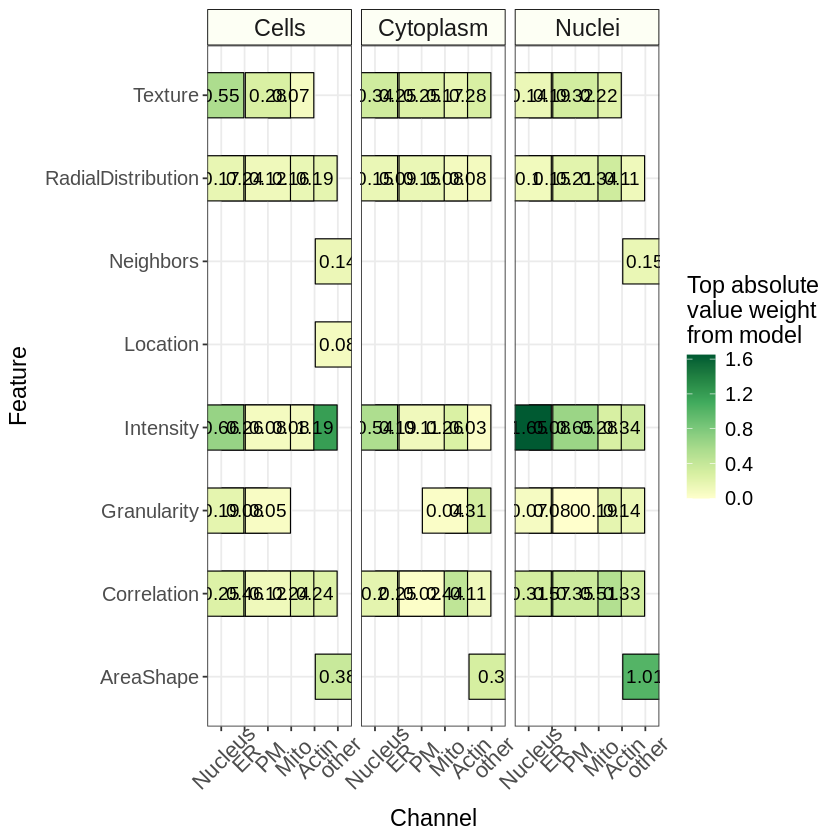

In [7]:
# Add rounded coefficient values to the data frame
all_coef_df <- all_coef_df %>%
    mutate(rounded_coeff = round(Coefficient, 2))

# Reorder the channel_cleaned factor levels
channel_order <- c("Nucleus", "ER", "PM", "Mito", "Actin", "other")
all_coef_df <- all_coef_df %>%
    mutate(channel_cleaned = factor(channel_cleaned, levels = channel_order))

# Create the plot
all_coef_gg <- (
    ggplot(all_coef_df, aes(x = channel_cleaned, y = feature_group))
    + geom_point(aes(fill = Coefficient), pch = 22, size = 14)
    + geom_text(aes(label = rounded_coeff), size = 4)
    + facet_wrap("~compartment", ncol = 3)
    + theme_bw()
    + scale_fill_distiller(
        name = "Top absolute\nvalue weight\nfrom model",
        palette = "YlGn",
        direction = 1
    )
    + xlab("Channel")
    + ylab("Feature")
    + theme(
        axis.text = element_text(size = 12),
        axis.text.x = element_text(angle = 45, size = 13, vjust = 0.7, hjust = 0.5),
        axis.title = element_text(size = 14),
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 14),
        strip.text = element_text(size = 14),
        strip.background = element_rect(
            colour = "black",
            fill = "#fdfff4"
        ),
        legend.position = "right"
    )
)

# Save figure
ggsave(all_coef_fig, all_coef_gg, height = 5, width = 11.5, dpi = 500)

all_coef_gg

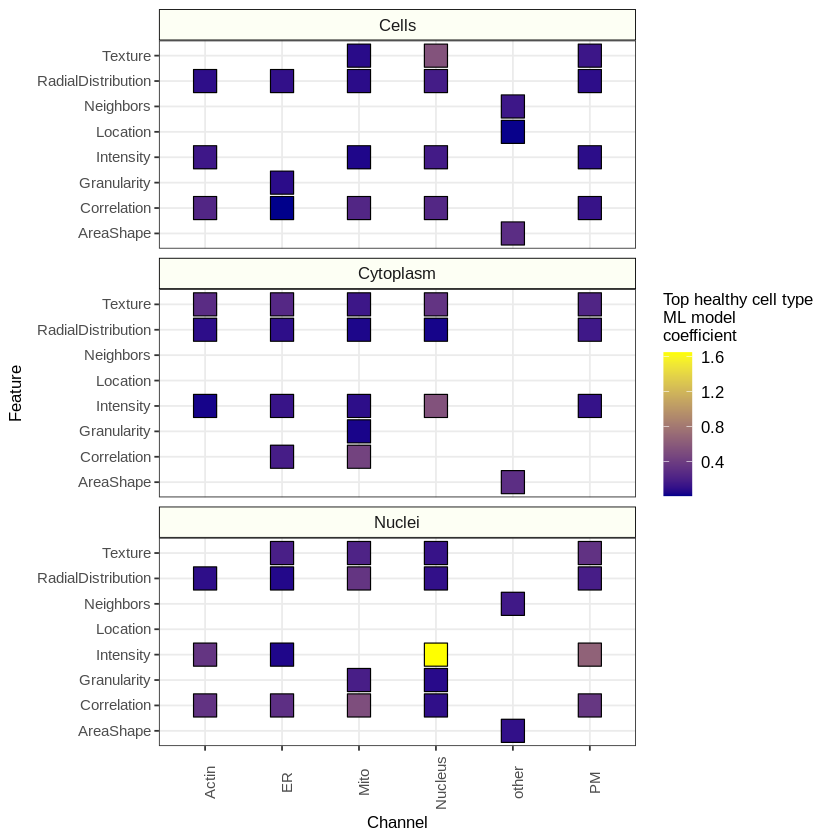

In [8]:
healthy_coef_gg <- (
    ggplot(healthy_coef_df, aes(x = channel_cleaned, y = feature_group))
    + geom_point(aes(fill = Healthy_Coeffs), pch = 22, size = 7)
    + facet_wrap("~compartment", ncol = 1)
    + theme_bw()
    + scale_fill_gradient(
        name="Top healthy cell type\nML model\ncoefficient",
        low = "darkblue",
        high = "yellow",
    )
    + xlab("Channel")
    + ylab("Feature")
    + theme(
        axis.text = element_text(size = 9),
        axis.text.x = element_text(angle = 90, size = 9),
        axis.title = element_text(size = 10),
        legend.text = element_text(size = 10),
        legend.title = element_text(size = 10),
        strip.text = element_text(size = 10),
        strip.background = element_rect(
            colour = "black",
            fill = "#fdfff4"
        )
    )
)

# Save figure
ggsave(healthy_coef_fig, healthy_coef_gg, height = 9, width = 7, dpi = 500)

healthy_coef_gg


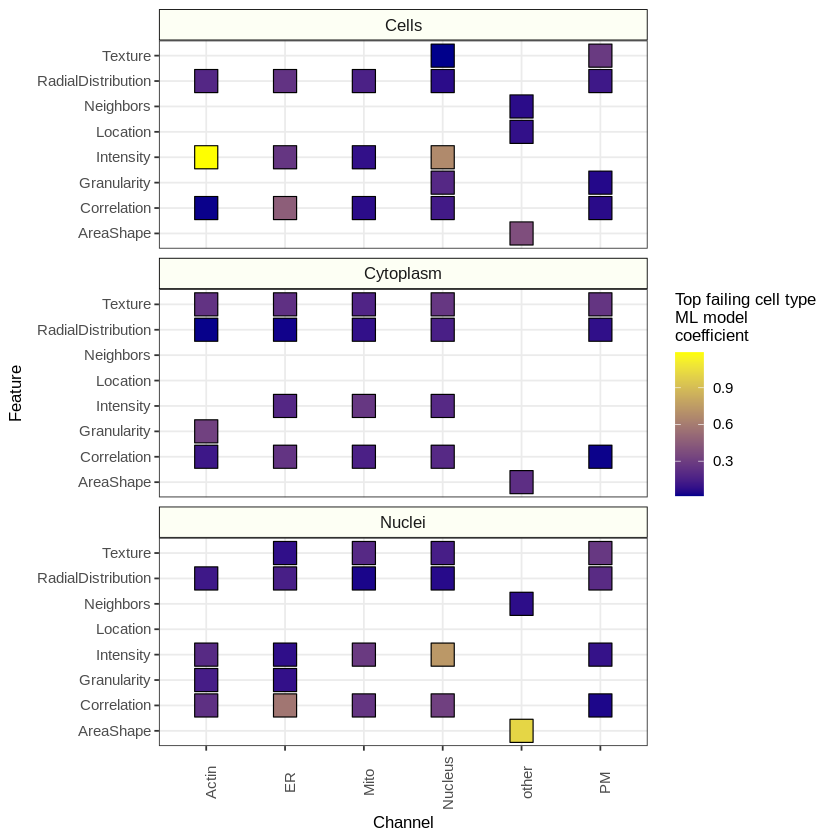

In [9]:
failing_coef_gg <- (
    ggplot(failing_coef_df, aes(x = channel_cleaned, y = feature_group))
    + geom_point(aes(fill = abs(Failing_Coeffs)), pch = 22, size = 7)
    + facet_wrap("~compartment", ncol = 1)
    + theme_bw()
    + scale_fill_gradient(
        name="Top failing cell type\nML model\ncoefficient",
        low = "darkblue",
        high = "yellow"
    )
    + xlab("Channel")
    + ylab("Feature")
    + theme(
        axis.text = element_text(size = 9),
        axis.text.x = element_text(angle = 90, size = 9),
        axis.title = element_text(size = 10),
        legend.text = element_text(size = 9),
        legend.title = element_text(size = 10),
        strip.text = element_text(size = 10),
        strip.background = element_rect(
            colour = "black",
            fill = "#fdfff4"
        )
    )
)

# Save figure
ggsave(failing_coef_fig, failing_coef_gg, height = 8, width = 7, dpi = 500)

failing_coef_gg

## Generate link plot with all coefficients and rank

In [10]:
ranked_coef_df

Feature,compartment,feature_group,measurement,channel,parameter1,parameter2,parameter3,Coefficient,Rank,channel_cleaned
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Nuclei_Intensity_MeanIntensityEdge_Hoechst,Nuclei,Intensity,MeanIntensityEdge,Hoechst,NA,NA,NA,1.6491632,1,Nucleus
Cells_Intensity_IntegratedIntensityEdge_Actin,Cells,Intensity,IntegratedIntensityEdge,Actin,NA,NA,NA,-1.1894472,638,Actin
Nuclei_AreaShape_MaxFeretDiameter,Nuclei,AreaShape,MaxFeretDiameter,NA,NA,NA,NA,-1.0103446,637,other
Nuclei_Intensity_MinIntensityEdge_Hoechst,Nuclei,Intensity,MinIntensityEdge,Hoechst,NA,NA,NA,0.9568708,2,Nucleus
Nuclei_Intensity_StdIntensityEdge_Hoechst,Nuclei,Intensity,StdIntensityEdge,Hoechst,NA,NA,NA,-0.7317210,636,Nucleus
Cells_Intensity_StdIntensityEdge_Hoechst,Cells,Intensity,StdIntensityEdge,Hoechst,NA,NA,NA,-0.6646935,635,Nucleus
Nuclei_Intensity_IntegratedIntensity_PM,Nuclei,Intensity,IntegratedIntensity,PM,NA,NA,NA,0.6472661,3,PM
Nuclei_Correlation_K_ER_Mitochondria,Nuclei,Correlation,K,ER,Mitochondria,NA,NA,-0.5720264,634,ER
Cells_Texture_AngularSecondMoment_Hoechst_3_01_256,Cells,Texture,AngularSecondMoment,Hoechst,3,01,256,0.5496822,4,Nucleus


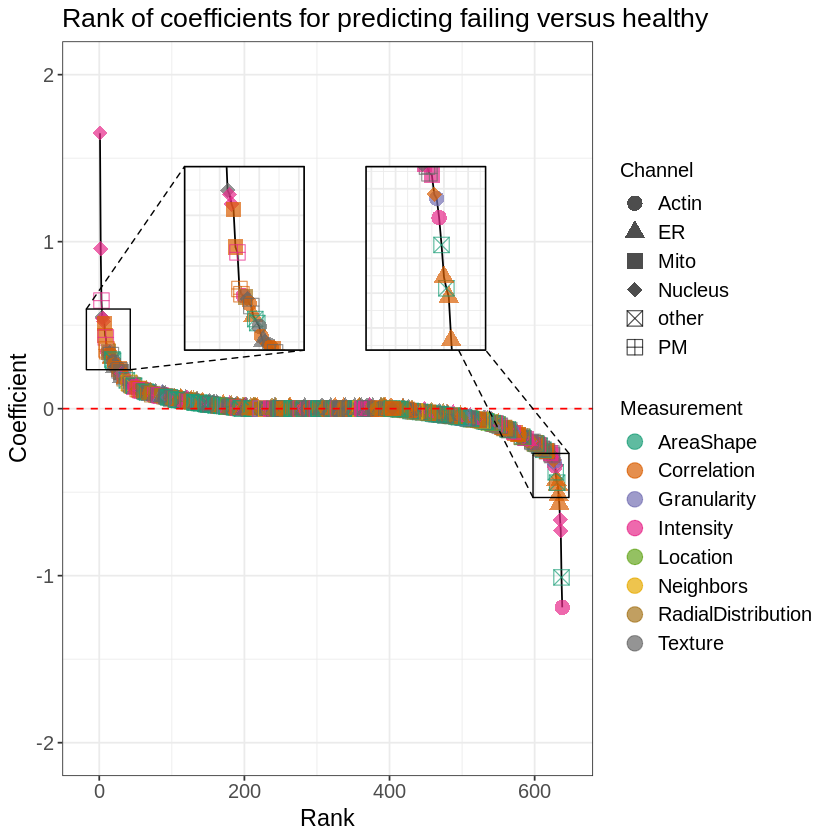

In [11]:
# Creating a line plot with ggplot
coef_rank_plot <- ggplot(ranked_coef_df, aes(x = Rank, y = Coefficient, color = feature_group, shape = channel_cleaned)) +
  geom_line(aes(group = 1), color = "black") +
  geom_point(size = 4, alpha = 0.7) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Rank of coefficients for predicting failing versus healthy", x = "Rank", y = "Coefficient") +
  scale_color_brewer(name = "Measurement", palette = "Dark2") +
  scale_shape_manual(name = "Channel", values = c(16, 17, 15, 18, 7, 12)) +
  theme_bw()+
  ylim(-2, 2) +
  theme(
    # Increasing font sizes
    text = element_text(size = 12), # Adjust the number to change the font size

    # Increasing font sizes for specific elements
    axis.title.x = element_text(size = 14), # X-axis title
    axis.title.y = element_text(size = 14), # Y-axis title
    plot.title = element_text(size = 16),   # Main title
    axis.text.x = element_text(size = 12),  # X-axis tick labels
    axis.text.y = element_text(size = 12),  # Y-axis tick labels
    legend.text = element_text(size = 12)   # Legend font size
  )

# Save figure before zoom
ggsave(ranked_coef_fig, coef_rank_plot, height = 8, width = 12, dpi = 500)

# Add zoomed in portions
# Top features from healthy (positive)
from <- list(-15, 40, 0.25, 0.58) #xmin, xmax, ymin, ymax
to <- list(125, 275, 0.4, 1.4)
coef_rank_plot <- coef_rank_plot + geom_magnify(
    from = from, to = to
)
# Top features from failing (negative)
from <- list(600, 645, -0.52, -0.28) #xmin, xmax, ymin, ymax
to <- list(375, 525, 1.4, 0.4)
coef_rank_plot <- coef_rank_plot + geom_magnify(
    from = from, to = to
)

# Create a new save path with "_zoom" added to save the added zoomed in portions
ranked_coef_fig_zoom <- gsub(".png$", "_zoom.pdf", ranked_coef_fig)

# Save figure after adding zooms
ggsave(ranked_coef_fig_zoom, coef_rank_plot, height = 8, width = 12, dpi = 500)

coef_rank_plot